In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
mainData = pd.read_csv("game_logs_2.csv")

C:\Users\amjad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = mainData[["date","v_score","h_score", "day_night","v_game_number","h_game_number","attendance",
               "day_of_week","length_minutes","length_outs",'v_homeruns','h_homeruns',"v_errors",
               "h_errors"]]

In [4]:
df.dtypes

date                int64
v_score             int64
h_score             int64
day_night          object
v_game_number       int64
h_game_number       int64
attendance        float64
day_of_week        object
length_minutes    float64
length_outs       float64
v_homeruns        float64
h_homeruns        float64
v_errors          float64
h_errors          float64
dtype: object

In [5]:
#df['date'] = datetime.strptime('18710504', '%Y%m%d')
#df[['date']]

## 1- hosting team VS visiting team wins

In [6]:
#taking only the first four degits that indicate the year
df['year'] = df.date.astype(str).str[:4].astype(int)

<ipython-input-6-26ee3036bf95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.date.astype(str).str[:4].astype(int)


In [7]:
#group the targeted columns by year
yearh = df.groupby('year')['h_score'].mean()
yearv = df.groupby('year')['v_score'].mean()

Text(0.5, 0, 'Year')

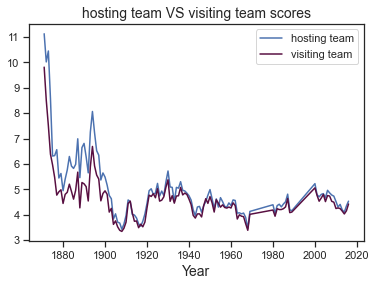

In [8]:
#plot v_team and h_team average scores by year
hteam, = plt.plot(yearh, label="hosting team")
vteam, = plt.plot(yearv, color="#580f41", label="visiting team")

plt.title('hosting team VS visiting team scores', size=14)
plt.legend(handles=[hteam,vteam])
plt.xlabel("Year", size=14)

- Through the time the hosting team get better scores than the visiting team witch indicate that there is an advantage 

 ## 2- Team game number of the season and the score

In [9]:
#group the average of h_team and v_team scores by the game number
gameNumberv = df.groupby('v_game_number')['v_score'].mean()
gameNumberh = df.groupby('h_game_number')['h_score'].mean()

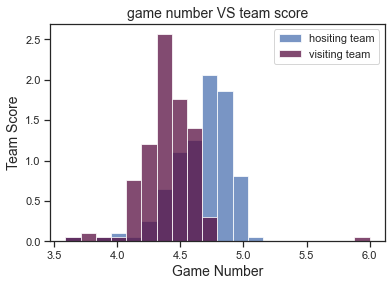

In [10]:
bins=np.histogram(np.hstack((gameNumberh, gameNumberv)), bins=20)[1]
plt.hist(gameNumberh, bins, density=True, alpha=0.75 )
plt.hist(gameNumberv, bins, density=True, alpha=0.75,color="#580f41")

plt.title('game number VS team score', size=14)
plt.legend(['hositing team','visiting team'])
plt.xlabel("Game Number", size=14)
plt.ylabel("Team Score", size=14)
plt.show()

- Genrally, teams do best and score more after playing several games
- Teams that go to other teams playground at their inisial games more likely to get hight scores than home team
- Teams that host the game after the mid season will likely to get more score than the visiting team 

## 3- Number of ttendance during days of the week 

In [17]:
from pandas.api.types import CategoricalDtype

#group the average of h_team and v_team scores by the game number
attendance = df.groupby('day_of_week')['attendance'].mean()

#order the days 
cats = ['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
df['day_of_week'] = df['day_of_week'].astype(CategoricalDtype(categories = ['Sat','Sun','Mon',
                                                                     'Tue','Wed','Thu','Fri'],
                                                      ordered=True))

Text(0, 0.5, 'Attendance')

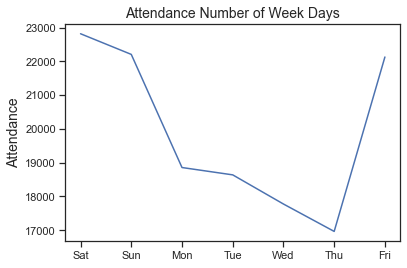

In [20]:
plt.plot(attendance)
plt.title('Attendance Number of Week Days', size=14)
plt.ylabel("Attendance", size=14)

- If you are a team manager and your team gets excited when they have more audience avoid scheduling games on Thursdays.
- If you have a business that is affected by the number of audiences -like selling food- knowing the average number of audiences each day might help planning.

## 4- Errors appears more in home team or visiting team